In [1]:
# Import the dependencies.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude conbinations.

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)

lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.

coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.

for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

47.217419630026995 -17.580042243508984
-66.55920022811374 175.21911994284915
34.0221078718678 -129.18107185258324
19.4438005151259 -147.06250997827283
3.733406214133325 115.65656613619853
20.799973624142922 28.037480879586326
57.75495464797609 63.923899290824835
59.184625880091716 156.65430001701554
-21.272366403665302 76.68527261340381
73.15443980534596 80.48946585134115
-51.190965749344656 129.38780194190923
-58.39398587940808 -172.82550109793883
8.29215990769535 -58.8613974886229
-11.899044198766418 167.58269850433697
15.311235384244782 156.48938552079875
-83.87704492573359 92.87546044356327
-83.80036877827123 172.36992798773883
78.48987493014707 -30.394074451143496
-59.381597887515284 43.0298635030569
68.88703572024181 -97.17661893679191
84.93691178293261 25.065716308806003
-16.99264539070856 43.726795955700965
-27.690898149162592 -57.03018341301521
-79.54554134745104 132.79633081202775
16.557299926088106 120.08024637097986
68.79063564159623 139.7238898969386
-56.22759338771372 -50

71.12059042566418 146.46527054644946
74.96621292684458 -135.73811939139205
73.66412897575802 -81.40835606581437
11.33164421200415 127.04879211327898
-9.359011286969206 20.834400886107176
56.58831297500603 150.8496201176137
27.69328326525641 -49.04682896088718
88.33189871853747 -68.64976971077645
70.65793254868277 -160.77722597119444
-25.564079509677214 -139.41211312613234
-39.94794331685362 31.764784580263665
87.42055800618871 -73.35895581813789
-35.671048446643994 149.66410748014312
-74.3662272999775 48.34341289540703
-55.96634610180605 87.45289828412024
-53.930689262509475 143.58213099462722
-31.867174835636405 175.78183830015809
-58.206931035003116 -28.9361701811778
76.47528406984998 -56.11088841650576
-15.257816173709685 -53.598465032826454
83.65362091723861 107.69123137142753
-42.33179420123931 -10.837421383289438
88.39049022262375 105.55611230360955
-12.034483235494022 -60.805909312043525
-46.585328002411366 -137.80859137722007
-17.917801174779854 -133.27269308036801
52.565743468

-43.664940831277406 -160.94699466195212
-40.32191239628921 -140.97885043992693
68.98235990228642 -3.209013914911111
66.26438765394116 -47.7386069031526
59.39606196544133 94.99947367935499
74.40700714738247 -136.0978275684166
-23.23593326704828 89.7565874398648
12.006694644844956 -108.1127034420396
-56.37674047226455 36.51580377700847
-46.68423613648797 -1.9271477420639087
25.55270955714937 -43.32280708025135
34.93703823388323 -20.08109221012751
10.13983277138567 28.747571546665597
71.44877158248104 35.08474543298837
65.75740245543705 116.58624056574382
-77.78129170582291 3.6936643386003425
-35.251759571607074 81.46260015211408
-18.418689506902012 -8.175254297949408
-85.19836110781674 168.44097121072411


In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.

cities = []

# Identify the nearest city for each latitude and longitude combination.

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    
    if city not in cities:
        cities.append(city)
    
# Print the city count to confirm sufficent count.

len(cities)

614

In [7]:
# Import the requests library.

import requests

# Import the API key.

from config import weather_api_key

In [ ]:
# Starting URL for Weather Map API Call.

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Import the time library and the datetime module from the datetime library

import time 
from datetime import datetime

In [13]:
# Create an empty list to hold the weather data.

city_data = []

# Print the beginning of the logging.

print("Beginning Data Retrieval     ")
print("-----------------------------")


# Create counters.

record_count = 1
set_count = 1

# Loop through all the cities in the list.

for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city.
    
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    
    record_count += 1
    
    # Run an API request for each of the cities.
    
    try:
        # Parse the JSON and retrieve data.
        
        city_weather = requests.get(city_url).json()
        
        #Parse out the needed data.
        
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        
        city_date = datetime. utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
# If an error is experienced, skip the city.
    except: 
        print("City not found.  Skipping...")
        pass
        
# Indicate the Data Loading is complete.
print("----------------------------")
print("Data Retrieval Complete     ")
print("----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dingle
Processing Record 2 of Set 1 | kaitangata
Processing Record 3 of Set 1 | half moon bay
Processing Record 4 of Set 1 | hilo
Processing Record 5 of Set 1 | limbang
Processing Record 6 of Set 1 | marawi
Processing Record 7 of Set 1 | turinsk
Processing Record 8 of Set 1 | tigil
Processing Record 9 of Set 1 | grand river south east
City not found.  Skipping...
Processing Record 10 of Set 1 | dikson
Processing Record 11 of Set 1 | mount gambier
Processing Record 12 of Set 1 | vaini
Processing Record 13 of Set 1 | mabaruma
Processing Record 14 of Set 1 | sola
Processing Record 15 of Set 1 | kavieng
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | bluff
Processing Record 18 of Set 1 | illoqqortoormiut
City not found.  Skipping...
Processing Record 19 of Set 1 | east london
Processing Record 20 of Set 1 | thompson
Processing Record 21 of Set 1 | longyearbyen
Processing Record

Processing Record 37 of Set 4 | avera
Processing Record 38 of Set 4 | egersund
Processing Record 39 of Set 4 | kandrian
Processing Record 40 of Set 4 | buariki
City not found.  Skipping...
Processing Record 41 of Set 4 | geraldton
Processing Record 42 of Set 4 | sulangan
Processing Record 43 of Set 4 | tabiauea
City not found.  Skipping...
Processing Record 44 of Set 4 | barrow
Processing Record 45 of Set 4 | nanortalik
Processing Record 46 of Set 4 | jishou
Processing Record 47 of Set 4 | saurimo
Processing Record 48 of Set 4 | airai
Processing Record 49 of Set 4 | amderma
City not found.  Skipping...
Processing Record 50 of Set 4 | sobolevo
Processing Record 1 of Set 5 | tumannyy
City not found.  Skipping...
Processing Record 2 of Set 5 | bontang
Processing Record 3 of Set 5 | dunedin
Processing Record 4 of Set 5 | bousso
Processing Record 5 of Set 5 | marcona
City not found.  Skipping...
Processing Record 6 of Set 5 | dawei
Processing Record 7 of Set 5 | maniitsoq
Processing Record 

Processing Record 29 of Set 8 | mount isa
Processing Record 30 of Set 8 | kathu
Processing Record 31 of Set 8 | rimbey
Processing Record 32 of Set 8 | altay
Processing Record 33 of Set 8 | griffith
Processing Record 34 of Set 8 | damietta
Processing Record 35 of Set 8 | la macarena
Processing Record 36 of Set 8 | nouadhibou
Processing Record 37 of Set 8 | jutai
Processing Record 38 of Set 8 | provideniya
Processing Record 39 of Set 8 | zemio
Processing Record 40 of Set 8 | ndele
Processing Record 41 of Set 8 | lingao
Processing Record 42 of Set 8 | zary
Processing Record 43 of Set 8 | lac du bonnet
Processing Record 44 of Set 8 | lufilufi
Processing Record 45 of Set 8 | urusha
Processing Record 46 of Set 8 | padang
Processing Record 47 of Set 8 | la romana
Processing Record 48 of Set 8 | cherskiy
Processing Record 49 of Set 8 | itaberaba
Processing Record 50 of Set 8 | sur
Processing Record 1 of Set 9 | tari
Processing Record 2 of Set 9 | stephenville
Processing Record 3 of Set 9 | ozg

Processing Record 19 of Set 12 | maridi
Processing Record 20 of Set 12 | yar-sale
Processing Record 21 of Set 12 | sovetskiy
Processing Record 22 of Set 12 | klaksvik
Processing Record 23 of Set 12 | catuday
Processing Record 24 of Set 12 | severnyy
Processing Record 25 of Set 12 | viedma
Processing Record 26 of Set 12 | honningsvag
Processing Record 27 of Set 12 | aguimes
Processing Record 28 of Set 12 | vostok
Processing Record 29 of Set 12 | ilhabela
Processing Record 30 of Set 12 | tunduru
City not found.  Skipping...
Processing Record 31 of Set 12 | wankaner
Processing Record 32 of Set 12 | pacifica
Processing Record 33 of Set 12 | kirakira
Processing Record 34 of Set 12 | rayachoti
Processing Record 35 of Set 12 | malkara
Processing Record 36 of Set 12 | sucre
Processing Record 37 of Set 12 | thayetmyo
Processing Record 38 of Set 12 | corinth
Processing Record 39 of Set 12 | tilichiki
Processing Record 40 of Set 12 | bahia blanca
Processing Record 41 of Set 12 | morehead
Processi

In [14]:
len(city_data)

570

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.

city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Dingle,10.9995,122.6711,84.88,71,45,0.87,PH,2022-06-15 00:58:51
1,Kaitangata,-46.2817,169.8464,43.36,85,95,15.64,NZ,2022-06-15 00:58:51
2,Half Moon Bay,37.4636,-122.4286,85.03,62,0,19.57,US,2022-06-15 00:58:51
3,Hilo,19.7297,-155.0900,84.27,81,12,3.00,US,2022-06-15 00:58:19
4,Limbang,4.7500,115.0000,82.51,80,96,1.86,MY,2022-06-15 00:58:52
5,Marawi,7.9986,124.2928,78.89,62,98,3.40,PH,2022-06-15 00:58:52
6,Turinsk,58.0458,63.6960,54.59,80,20,5.41,RU,2022-06-15 00:58:53
7,Tigil,57.8000,158.6667,58.60,50,100,2.68,RU,2022-06-15 00:58:53
8,Dikson,73.5069,80.5464,35.31,74,100,8.28,RU,2022-06-15 00:58:53
9,Mount Gambier,-37.8333,140.7667,57.11,94,100,12.66,AU,2022-06-15 00:58:54


In [19]:
# Change the order of columns.

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Dingle,PH,2022-06-15 00:58:51,10.9995,122.6711,84.88,71,45,0.87
1,Kaitangata,NZ,2022-06-15 00:58:51,-46.2817,169.8464,43.36,85,95,15.64
2,Half Moon Bay,US,2022-06-15 00:58:51,37.4636,-122.4286,85.03,62,0,19.57
3,Hilo,US,2022-06-15 00:58:19,19.7297,-155.0900,84.27,81,12,3.00
4,Limbang,MY,2022-06-15 00:58:52,4.7500,115.0000,82.51,80,96,1.86
5,Marawi,PH,2022-06-15 00:58:52,7.9986,124.2928,78.89,62,98,3.40
6,Turinsk,RU,2022-06-15 00:58:53,58.0458,63.6960,54.59,80,20,5.41
7,Tigil,RU,2022-06-15 00:58:53,57.8000,158.6667,58.60,50,100,2.68
8,Dikson,RU,2022-06-15 00:58:53,73.5069,80.5464,35.31,74,100,8.28
9,Mount Gambier,AU,2022-06-15 00:58:54,-37.8333,140.7667,57.11,94,100,12.66


In [21]:
# Create the output file (CSV).

output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.

city_data_df.to_csv(output_data_file, index_label="City_ID")

In [24]:
# Extract relevant fields from the DataFrame for plotting.

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

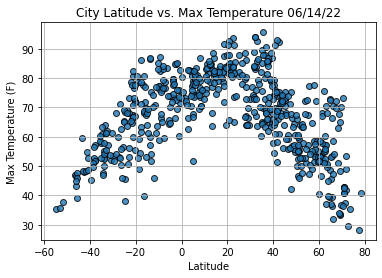

In [28]:
# Import time module

import time

# Build the scatter plot for latitude vs. max temperature.

plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
          
# Save the figure

plt.savefig("weather_data/Fig1.png")
          
# Show plot.
plt.show()

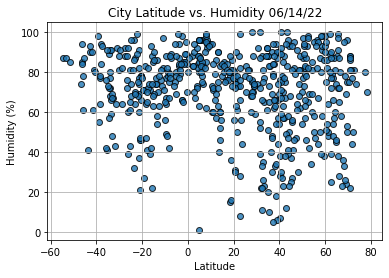

In [29]:
# Build the scatter plots for latitude vs. humidity.

plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
          
# Save the figure

plt.savefig("weather_data/Fig2.png")
          
# Show plot.
plt.show()


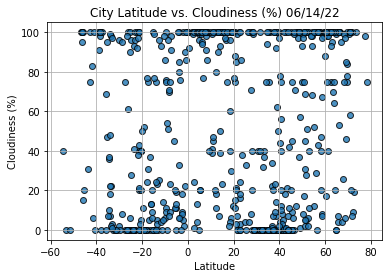

In [30]:
# Build the scatter plots for latitude vs. cloudiness.

plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
          
# Save the figure

plt.savefig("weather_data/Fig3.png")
          
# Show plot.
plt.show()

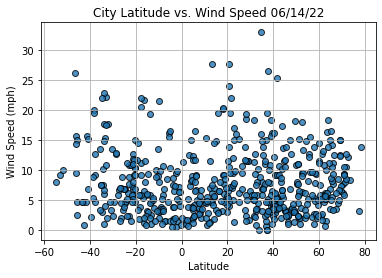

In [31]:
# Build the scatter plots for latitude vs. wind speed.

plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
          
# Save the figure

plt.savefig("weather_data/Fig4.png")
          
# Show plot.
plt.show()